# Cross Validation

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = load_iris()
X, y = data.data, data.target

## Model

In [3]:
model = DecisionTreeClassifier(random_state=42)

## Basic K-Fold Cross Validation

In [5]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

print("K-Fold Cross Validation Scores:\n", scores)
print()
print("Mean Accuracy:", np.mean(scores))


K-Fold Cross Validation Scores:
 [1.         0.96666667 0.93333333 0.93333333 0.93333333]

Mean Accuracy: 0.9533333333333335


## Stratified K-Fold


In [6]:
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
strat_scores = cross_val_score(model, X, y, cv=strat_kfold, scoring='accuracy')

print("Stratified K-Fold Scores:\n", strat_scores)
print()
print("Mean Stratified Accuracy:", np.mean(strat_scores))


Stratified K-Fold Scores:
 [1.         0.96666667 0.93333333 0.96666667 0.9       ]

Mean Stratified Accuracy: 0.9533333333333335


## Manual Fold Accuracy Inspection 

In [7]:
fold_no = 1
for train_index, test_index in strat_kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Fold {fold_no} Accuracy: {acc:.4f}")
    fold_no += 1

Fold 1 Accuracy: 1.0000
Fold 2 Accuracy: 0.9667
Fold 3 Accuracy: 0.9333
Fold 4 Accuracy: 0.9667
Fold 5 Accuracy: 0.9000


## Visualization: K-Fold Splits

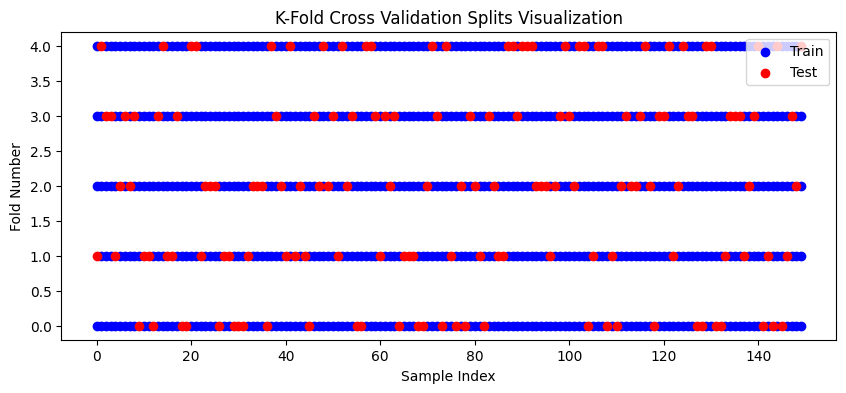

In [8]:
plt.figure(figsize=(10, 4))
for fold, (train_index, test_index) in enumerate(kfold.split(X, y)):
    plt.scatter(train_index, [fold]*len(train_index), color="blue", label="Train" if fold == 0 else "")
    plt.scatter(test_index, [fold]*len(test_index), color="red", label="Test" if fold == 0 else "")

plt.title("K-Fold Cross Validation Splits Visualization")
plt.xlabel("Sample Index")
plt.ylabel("Fold Number")
plt.legend()
plt.show()